In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Divergence problem

##### Variant A

In [ ]:
model = CmdStanModel(stan_file='stan1.stan')

In [ ]:
result = model.sample(data={'N':1, 'y':[1]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [ ]:
print(result.diagnose())

In [ ]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

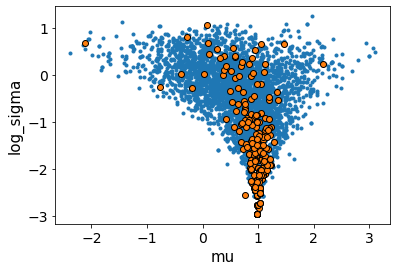

In [ ]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

##### Variant B

In [ ]:
model = CmdStanModel(stan_file='stan1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [ ]:
result = model.sample(data={'N':5, 'y':[1.05, 0.87, -0.49, -0.22, 0.18]}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [ ]:
print(result.diagnose())

In [ ]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

<AxesSubplot:xlabel='mu', ylabel='log_sigma'>

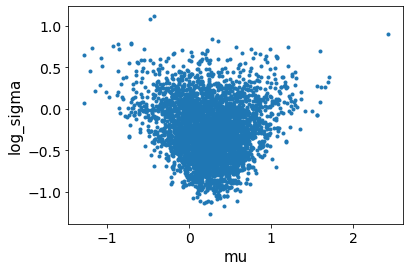

In [ ]:
#Arviz plot
az.plot_pair(arviz_result, var_names=['mu', 'log_sigma'], divergences=True)

## Excercise 2 - Binominial example

In [ ]:
#Data read fromm coin.csv
data = pd.read_csv('coin.csv')
data
y = data['Toss_Result'] 
N = len(y) 

418

In [ ]:
model = CmdStanModel(stan_file='stan2.stan')
result = model.sample(data={"N" : N, "y" : y}, 
                            seed = 9012022,
                            chains = 4)

In [ ]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-290.00,0.01800,0.720,-290.00,-290.00,-290.0,1600.0,8200.0,1.0
theta,0.46,0.00066,0.025,0.42,0.46,0.5,1400.0,7100.0,1.0


In [ ]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result
)
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

array([[<AxesSubplot:title={'center':'theta'}>]], dtype=object)

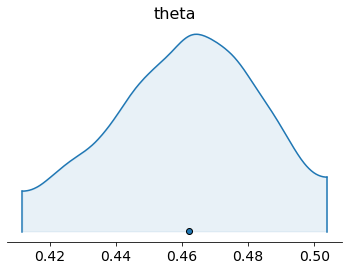

In [ ]:
#Plot
az.plot_density(arviz_result,shade=0.1)

## Excercise 3 - Predictive checks


In [ ]:
#Data read from normal.csv
data_normal = pd.read_csv('normal.csv')

y = data_normal['value'] 
N = len(y)


#### Posterior predictive

In [ ]:
model = CmdStanModel(stan_file='stan3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [ ]:
result = model.sample(data={'N':N, 'y':y}, 
                            seed = 9012022,
                            chains = 4)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |██████▊   | 00:00 Iteration: 1200 / 2000 [ 60%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [ ]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-1.7000,0.038,1.10,-4.000,-1.3000,-0.55,920.0,960.0,1.0
mu,0.0190,0.022,0.99,-1.600,0.0051,1.70,2100.0,2100.0,1.0
sigma,0.7900,0.014,0.61,0.052,0.6600,2.00,1900.0,2000.0,1.0
y_rep[1],0.0420,0.026,1.40,-2.100,0.0350,2.30,2863.0,2960.0,1.0
y_rep[2],0.0350,0.028,1.40,-2.200,0.0100,2.30,2561.0,2648.0,1.0
...,...,...,...,...,...,...,...,...,...
y_rep[96],0.0056,0.027,1.40,-2.200,-0.0076,2.20,2718.0,2810.0,1.0
y_rep[97],0.0150,0.026,1.40,-2.200,-0.0150,2.20,2756.0,2850.0,1.0
y_rep[98],0.0200,0.026,1.40,-2.200,0.0440,2.30,2794.0,2890.0,1.0


In [ ]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=result,
    posterior_predictive=["y_rep"], 
    observed_data={"y": y},
)
arviz_result

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

(-4.0, 4.0, 0.0, 1.0)

E:\Programy\anconda3\envs\data_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


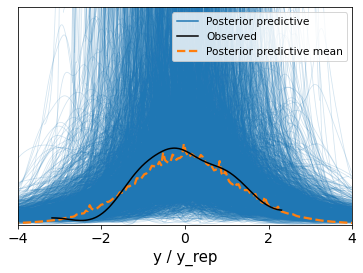

In [ ]:
#Arviz plot
az.plot_ppc(arviz_result,data_pairs={"y": "y_rep"})
plt.axis([-4, 4, 0, 1])

#### Prior predictive

In [ ]:
model = CmdStanModel(stan_file='stan4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [ ]:
result = model.sample(data={'N':100}, 
                            chains = 1,
                            fixed_param=True,
                            seed = 523833
                            )

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [ ]:
result.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,0.0000,NaN,0.0,0.000,0.0000,0.0,NaN,NaN,NaN
mu,-0.0220,0.031,1.0,-1.700,-0.0150,1.6,1100.0,8400.0,1.0
sigma,0.7900,0.019,0.6,0.041,0.6700,1.9,1000.0,8000.0,1.0
y_prior[1],-0.0540,0.042,1.4,-2.300,-0.0740,2.3,1126.0,9012.0,1.0
y_prior[2],0.0360,0.045,1.4,-2.100,-0.0077,2.4,1003.0,8025.0,1.0
...,...,...,...,...,...,...,...,...,...
y_prior[96],-0.0490,0.042,1.3,-2.200,-0.0060,2.0,1045.0,8358.0,1.0
y_prior[97],0.0027,0.050,1.4,-2.100,0.0300,2.2,770.0,6159.0,1.0
y_prior[98],-0.0190,0.041,1.4,-2.100,-0.0500,2.3,1178.0,9424.0,1.0


In [ ]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    prior=result,
    prior_predictive=["y_prior"],
    observed_data={"y": y}
)
arviz_result

Inference data with groups:
	> prior
	> prior_predictive
	> sample_stats_prior
	> observed_data

(-4.0, 4.0, 0.0, 1.0)

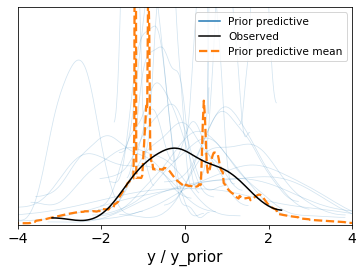

In [ ]:
az.plot_ppc(arviz_result, group="prior", data_pairs={"y": "y_prior"}, num_pp_samples=30)
plt.axis([-4, 4, 0, 1])

In [ ]:
#Draw y_prior histogram
data = pd.read_csv('y_prior_data.csv', comment='#')
data

,lp__,accept_stat__,mu,sigma,y_prior.1,y_prior.2,y_prior.3,y_prior.4,y_prior.5,y_prior.6,...,y_prior.91,y_prior.92,y_prior.93,y_prior.94,y_prior.95,y_prior.96,y_prior.97,y_prior.98,y_prior.99,y_prior.100
0,0,0,1.143950,0.458000,1.426230,0.981473,0.943671,0.878288,1.791640,1.746490,...,0.799357,0.980620,1.032690,1.359670,1.639290,1.492130,0.759171,1.629400,1.482340,1.776270
1,0,0,-1.169530,0.874341,0.216120,-1.303050,-0.726514,0.332551,-0.640850,-1.847060,...,-1.138250,0.566416,0.880932,-2.808660,-1.942380,-0.763236,-0.794983,-1.916720,0.787643,0.020107
2,0,0,-0.956851,2.882220,-2.089090,3.051790,0.691508,0.038862,-5.041140,-5.637670,...,2.676460,3.333740,-3.804460,4.575260,-0.274672,-4.574360,1.372500,0.717983,0.596396,-0.211560
3,0,0,-2.077410,1.486490,-3.263060,-0.685292,-5.953970,-4.071510,-0.267076,-4.179610,...,-1.593860,-0.007647,0.469058,-4.282310,-5.353800,2.353770,-2.652080,-2.013050,-0.756132,-2.193920
4,0,0,0.290313,0.869126,-0.545136,1.683570,2.003820,-0.975712,0.245573,0.968976,...,1.715530,-0.532322,1.124910,0.049586,-0.231925,-0.060006,1.021670,0.684867,-0.283691,-1.026130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,-0.962735,0.311852,-1.161130,-1.208950,-0.869010,-1.216760,-0.575603,-0.811123,...,-0.769377,-0.811191,-0.733466,-1.233680,-0.211138,-1.034820,-1.050010,-1.265600,-1.123470,-1.221230
996,0,0,-0.407848,1.191450,1.051200,0.841235,-1.749500,-0.346045,-2.687160,-1.513870,...,-0.499929,-1.928200,-1.971660,-0.236292,0.271689,0.369934,-1.981410,-0.386491,-0.669667,-0.040689
997,0,0,0.129531,0.793053,-0.749199,-0.336267,1.199220,0.034981,1.858270,-1.304080,...,-0.521497,0.225726,-1.016880,0.186156,0.757725,0.999419,0.905195,0.830877,0.971887,0.393194
998,0,0,0.004315,0.664607,0.229782,0.926047,-0.015176,-0.055419,0.554630,0.254990,...,-0.422506,-1.045530,-0.275646,-0.155792,0.942509,0.785119,1.212960,-0.584002,0.981324,0.630158


C:\Users\piotr\AppData\Local\Temp\ipykernel_10252\1461006296.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data[['y_prior.1', 'y_prior.25', 'y_prior.50', 'y_prior.100']].hist(ax=ax)


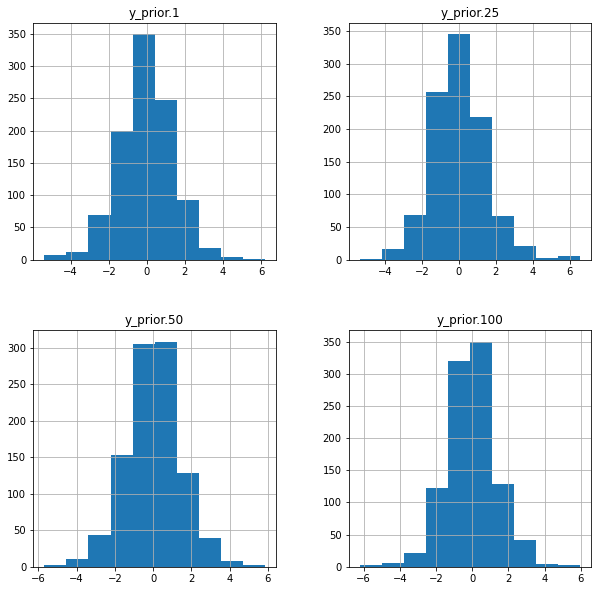

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
data[['y_prior.1', 'y_prior.25', 'y_prior.50', 'y_prior.100']].hist(ax=ax)
plt.show()